<a href="https://colab.research.google.com/github/glatham1/ECGR_4105_MachineLearning/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

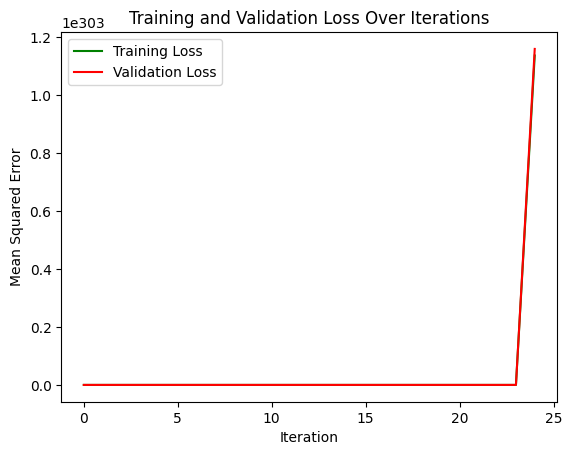

In [27]:
# Problem 1a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
filePath = "/content/Housing.csv"
housing = pd.read_csv(filePath)

# Filter data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = housing[features].values
y = housing['price'].values.reshape(-1, 1)

# Train-test split
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 25
m_train = len(X_train)
m_val = len(X_val)

# Initialize thetas to zeros (one more for the bias term)
theta = np.zeros((len(features) + 1, 1))

X_b_train = np.c_[np.ones((m_train, 1)), X_train]
X_b_val = np.c_[np.ones((m_val, 1)), X_val]

train_losses = []
val_losses = []

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(train_losses, color="green", label="Training Loss")
plt.plot(val_losses, color="red", label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

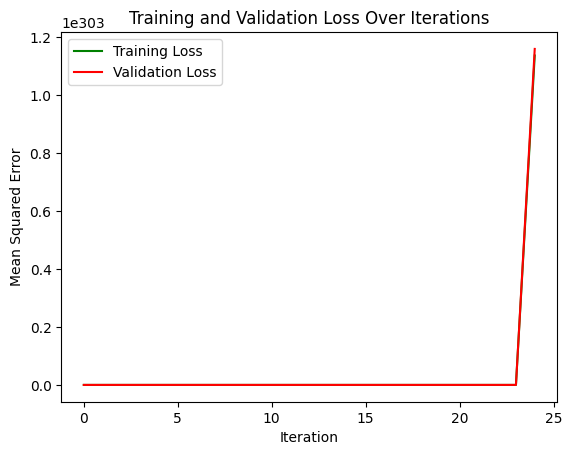

In [28]:
# Problem 1b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
filePath = "/content/Housing.csv"
housing = pd.read_csv(filePath)

# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Filter data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = housing[features].values
y = housing['price'].values.reshape(-1, 1)

# Train-test split
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 25
m_train = len(X_train)
m_val = len(X_val)

# Initialize thetas to zeros (one more for the bias term)
theta = np.zeros((len(features) + 1, 1))

X_b_train = np.c_[np.ones((m_train, 1)), X_train]
X_b_val = np.c_[np.ones((m_val, 1)), X_val]

train_losses = []
val_losses = []

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(train_losses, color="green", label="Training Loss")
plt.plot(val_losses, color="red", label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

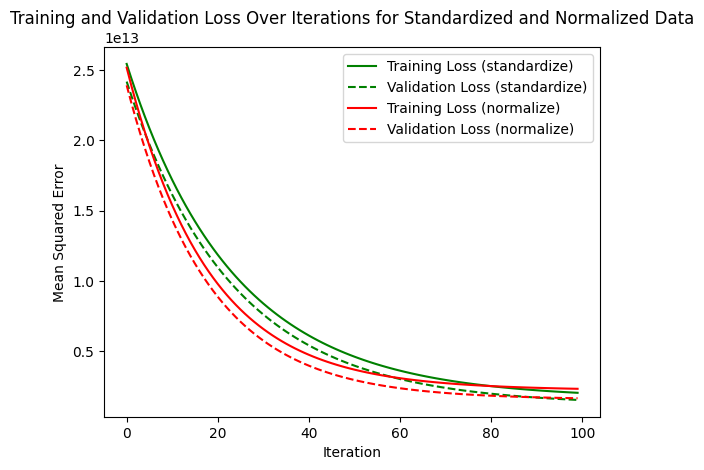

In [31]:
# Problem 2a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
filePath = "/content/Housing.csv"
housing = pd.read_csv(filePath)

# Filter data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = housing[features].values
y = housing['price'].values.reshape(-1, 1)

# Split the data
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# Initialize thetas
theta = np.zeros((len(features) + 1, 1))

# Define the standardization function
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

# Define the normalization function
def normalize_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val), min_val, max_val

# Train and evaluate using different preprocessing techniques
preprocess_methods = ['standardize', 'normalize']
losses = {'standardize': [], 'normalize': []}

for method in preprocess_methods:
    if method == 'standardize':
        X_train_proc, train_mean, train_std = standardize_data(X_train)
        X_val_proc = (X_val - train_mean) / train_std
    elif method == 'normalize':
        X_train_proc, train_min, train_max = normalize_data(X_train)
        X_val_proc = (X_val - train_min) / (train_max - train_min)

    X_b_train = np.c_[np.ones((m_train, 1)), X_train_proc]
    X_b_val = np.c_[np.ones((m_val, 1)), X_val_proc]

    theta = np.zeros((len(features) + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    losses[method].append(train_losses)
    losses[method].append(val_losses)

# Plot the training and validation loss for each preprocessing method
for method, color in zip(preprocess_methods, ['green', 'red']):
    plt.plot(losses[method][0], color=color, linestyle='-', label=f"Training Loss ({method})")
    plt.plot(losses[method][1], color=color, linestyle='--', label=f"Validation Loss ({method})")

plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized and Normalized Data")
plt.show()

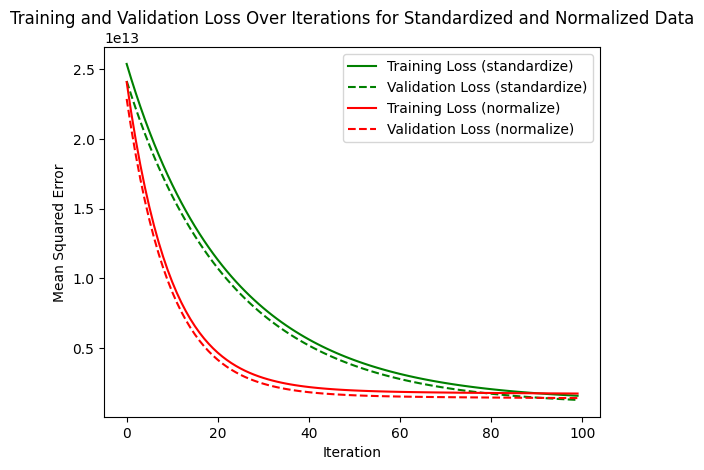

In [30]:
# Problem 2b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
filePath = "/content/Housing.csv"
housing = pd.read_csv(filePath)

# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Filter data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = housing[features].values
y = housing['price'].values.reshape(-1, 1)

# Split the data
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# Initialize thetas
theta = np.zeros((len(features) + 1, 1))

# Define the standardization function
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

# Define the normalization function
def normalize_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val), min_val, max_val

# Train and evaluate using different preprocessing techniques
preprocess_methods = ['standardize', 'normalize']
losses = {'standardize': [], 'normalize': []}

for method in preprocess_methods:
    if method == 'standardize':
        X_train_proc, train_mean, train_std = standardize_data(X_train)
        X_val_proc = (X_val - train_mean) / train_std
    elif method == 'normalize':
        X_train_proc, train_min, train_max = normalize_data(X_train)
        X_val_proc = (X_val - train_min) / (train_max - train_min)

    X_b_train = np.c_[np.ones((m_train, 1)), X_train_proc]
    X_b_val = np.c_[np.ones((m_val, 1)), X_val_proc]

    theta = np.zeros((len(features) + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
        val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    losses[method].append(train_losses)
    losses[method].append(val_losses)

# Plot the training and validation loss for each preprocessing method
for method, color in zip(preprocess_methods, ['green', 'red']):
    plt.plot(losses[method][0], color=color, linestyle='-', label=f"Training Loss ({method})")
    plt.plot(losses[method][1], color=color, linestyle='--', label=f"Validation Loss ({method})")

plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized and Normalized Data")
plt.show()

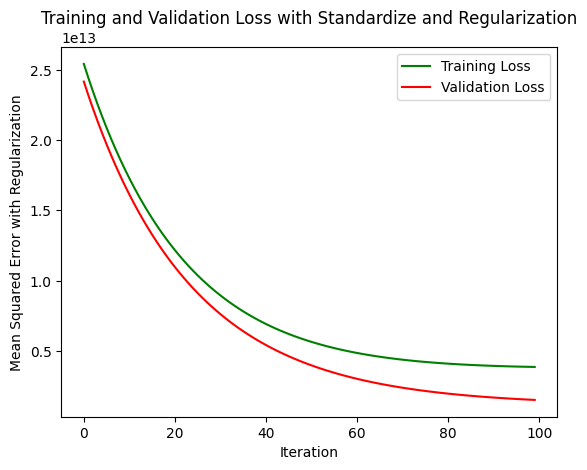

In [33]:
# Problem 3a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
filePath = "/content/Housing.csv"
housing = pd.read_csv(filePath)

# Filter data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = housing[features].values
y = housing['price'].values.reshape(-1, 1)

# Split the data
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# Parameters Penalty
penalty = 0.1

def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

def normalize_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val), min_val, max_val

# Evaluate both preprocessing techniques
methods = ['standardize', 'normalize']
final_val_losses = {}

for method in methods:
    if method == 'standardize':
        X_train_proc, train_mean, train_std = standardize_data(X_train)
        X_val_proc = (X_val - train_mean) / train_std
    elif method == 'normalize':
        X_train_proc, train_min, train_max = normalize_data(X_train)
        X_val_proc = (X_val - train_min) / (train_max - train_min)

    X_b_train = np.c_[np.ones((m_train, 1)), X_train_proc]
    X_b_val = np.c_[np.ones((m_val, 1)), X_val_proc]

    theta = np.zeros((len(features) + 1, 1))
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + 2 * penalty * theta
        gradients[0] = gradients[0] - 2 * penalty * theta[0]
        theta -= learning_rate * gradients

        val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))
        val_losses.append(val_loss)

    final_val_losses[method] = val_losses[-1]

# Choose the best scaling approach
best_method = min(final_val_losses, key=final_val_losses.get)

# If standardization is the best method
if best_method == 'standardize':
    X_train_proc, train_mean, train_std = standardize_data(X_train)
    X_val_proc = (X_val - train_mean) / train_std

# If normalization is the best method
elif best_method == 'normalize':
    X_train_proc, train_min, train_max = normalize_data(X_train)
    X_val_proc = (X_val - train_min) / (train_max - train_min)

# Now train and plot only using the best method
X_b_train = np.c_[np.ones((m_train, 1)), X_train_proc]
X_b_val = np.c_[np.ones((m_val, 1)), X_val_proc]

theta = np.zeros((len(features) + 1, 1))
train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + 2 * penalty * theta
    gradients[0] = gradients[0] - 2 * penalty * theta[0]
    theta -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + penalty * np.sum(np.square(theta))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the results
plt.plot(train_losses, color='green', linestyle='-', label="Training Loss")
plt.plot(val_losses, color='red', linestyle='-', label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error with Regularization")
plt.legend()
plt.title(f"Training and Validation Loss with {best_method.capitalize()} and Regularization")
plt.show()


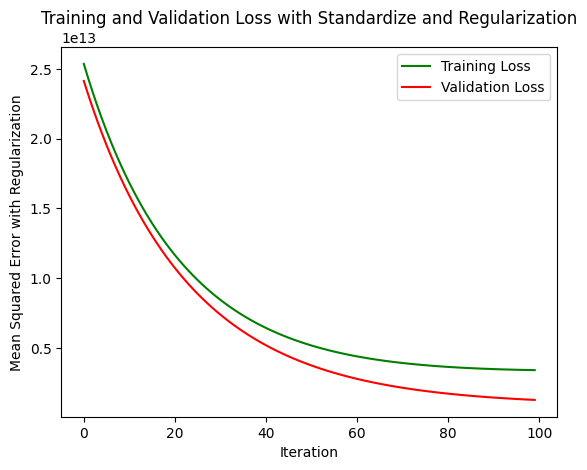

In [32]:
# Problem 3b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
filePath = "/content/Housing.csv"
housing = pd.read_csv(filePath)

# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Filter data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = housing[features].values
y = housing['price'].values.reshape(-1, 1)

# Split the data
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# Parameters Penalty
penalty = 0.1

def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

def normalize_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val), min_val, max_val

# Evaluate both preprocessing techniques
methods = ['standardize', 'normalize']
final_val_losses = {}

for method in methods:
    if method == 'standardize':
        X_train_proc, train_mean, train_std = standardize_data(X_train)
        X_val_proc = (X_val - train_mean) / train_std
    elif method == 'normalize':
        X_train_proc, train_min, train_max = normalize_data(X_train)
        X_val_proc = (X_val - train_min) / (train_max - train_min)

    X_b_train = np.c_[np.ones((m_train, 1)), X_train_proc]
    X_b_val = np.c_[np.ones((m_val, 1)), X_val_proc]

    theta = np.zeros((len(features) + 1, 1))
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + 2 * penalty * theta
        gradients[0] = gradients[0] - 2 * penalty * theta[0]
        theta -= learning_rate * gradients

        val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))
        val_losses.append(val_loss)

    final_val_losses[method] = val_losses[-1]

# Choose the best scaling approach
best_method = min(final_val_losses, key=final_val_losses.get)

# If standardization is the best method
if best_method == 'standardize':
    X_train_proc, train_mean, train_std = standardize_data(X_train)
    X_val_proc = (X_val - train_mean) / train_std

# If normalization is the best method
elif best_method == 'normalize':
    X_train_proc, train_min, train_max = normalize_data(X_train)
    X_val_proc = (X_val - train_min) / (train_max - train_min)

# Now train and plot only using the best method
X_b_train = np.c_[np.ones((m_train, 1)), X_train_proc]
X_b_val = np.c_[np.ones((m_val, 1)), X_val_proc]

theta = np.zeros((len(features) + 1, 1))
train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m_train * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + 2 * penalty * theta
    gradients[0] = gradients[0] - 2 * penalty * theta[0]
    theta -= learning_rate * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train)) + penalty * np.sum(np.square(theta))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the results
plt.plot(train_losses, color='green', linestyle='-', label="Training Loss")
plt.plot(val_losses, color='red', linestyle='-', label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error with Regularization")
plt.legend()
plt.title(f"Training and Validation Loss with {best_method.capitalize()} and Regularization")
plt.show()